In [2]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import time

# harmonic oscillator

In [64]:
omega = 1
m = 1
alpha = 1

T = 0.5*np.pi/omega
Nscale = 0
L = 30
M = 16000
N = int(10*T)
x = np.linspace(-L, L, M + 1)
dx = 2*L/M
dt = T/(N + 1)
#---------------------------------------------------------
#time_seconds = np.log(N) * M**3 * 1.8e-10
time_seconds = N * M**2 * 6e-9
hours = int(time_seconds // 3600)
minutes = int((time_seconds % 3600) // 60)
seconds = int(time_seconds % 60)
print(f'(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+'))')
print(f"Estimated time: {hours}h {minutes}min {seconds}s")
coK = dx * (m/(2*np.pi*1j*dt))**(1/2)
coK_power = coK**(N+1)
print(f'coeff of K = {coK}')
print(f'coeff of K^(N+1) = {coK_power}')
print(f'|coeff of K^(N+1)|^2 = {(coK_power.real)**2 + (coK_power.imag)**2}')

(T=1.5707963267948966, L=30, M=16000, N=15, (Nscale=0))
Estimated time: 0h 0min 23s
coeff of K = (0.003376186185589148-0.003376186185589148j)
coeff of K^(N+1) = (7.295619606198416e-38+0j)
|coeff of K^(N+1)|^2 = 5.322606543834672e-75


In [68]:
print(f'(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+'))')
ta_start = time.time()
psi_0 = (m*omega / np.pi)**(1/4) * np.exp(- m*omega/2 * (x - np.sqrt(2/(m*omega)) * alpha.real)**2 + 1j * np.sqrt(2*m*omega) * alpha.imag * x - 1j * alpha.real * alpha.imag)

# Assuming x is a NumPy array
x = np.asarray(x)
X_i, X_j = np.meshgrid(x, x, indexing='ij')
weight1 = 1
weight2 = 1
K = (m / (2 * np.pi * 1j * dt))**0.5 * (
    np.exp(1j * (m / 2 * (X_i - X_j)**2 / dt)) * (weight1*np.exp((- 1j * dt * m*omega**2/2 * X_i**2)) + weight2*np.exp((- 1j * dt * m*omega**2/2 * X_j**2)))/(weight1+weight2)
)
#print(f'condition(K) = {np.linalg.cond(K)}')

run_time_start = time.time()
print(f'ta = {run_time_start - ta_start:.3f}s')
psi_final = psi_0
for i in range(N+1):
    psi_final = dx * K @ psi_final
run_time_end = time.time()

#print(f't/complexity = {(run_time_end-run_time_start)/(np.log(N) * M**3)}')
print(f't/complexity = {(run_time_end-run_time_start)/(N * M**2)}')
np.save('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy', psi_final)

(T=1.5707963267948966, L=30, M=16000, N=15, (Nscale=0))
ta = 72.034s
t/complexity = 7.851185835897923e-09


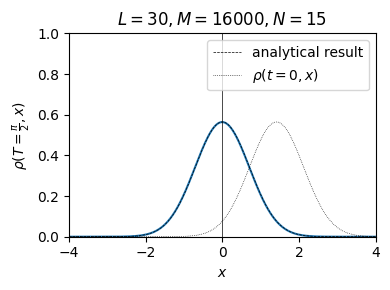

A = 0.563660 * 10^(0)
1
A_analytically = 0.9999999999999969


In [74]:
load = 0
if load == 0:
    psi_final = np.load('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy')
else: # load == 1
    psi_final = np.load('data/(T=0.5, L=400, M=12000, N=5, (Nscale=0)) - psi_final.npy')
    T=0.5
    L=400
    M=12000
    N=5

    x = np.linspace(-L, L, M+1)
    dx = 2*L/M

rho_final = (psi_final.real)**2 + (psi_final.imag)**2
xmax = 4
xmin = -4
rho_renormalized = []
for i in range(len(psi_final)):
    if x[i] + dx > xmin and x[i] - dx < xmax:
        rho_renormalized.append(rho_final[i])
    else:
        rho_renormalized.append(0)
rho_renormalized = np.array(rho_renormalized)
A = 1 #sum(rho_renormalized) * dx
rho_renormalized = rho_renormalized / A
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, rho_renormalized)
m=1
omega=1
alpha_t = alpha * np.exp(- 1j * omega * T)
psi_analytically = (m*omega / np.pi)**(1/4) * np.exp(
    - m*omega/2 * (x - np.sqrt(2/(m*omega)) * alpha_t.real)**2 + 1j * np.sqrt(2*m*omega) * alpha_t.imag * x + 1j * (- omega*T/2 - alpha_t.real * alpha_t.imag)
)
rho_analytically = (psi_analytically.real)**2 + (psi_analytically.imag)**2
#rho_analytically = np.sqrt(m*omega/np.pi) * np.exp(-m*omega*(x - np.sqrt(2/(m*omega)) * alpha_t.real)**2)
A_analytically = sum(rho_analytically) * dx
ax.plot(x, rho_analytically, linestyle='--', linewidth=0.5, color='black', label='analytical result')
rho_0 = np.sqrt(m*omega/np.pi) * np.exp(-m*omega*(x - np.sqrt(2/(m*omega)) * alpha.real)**2)
ax.plot(x, rho_0, linestyle=':', linewidth=0.5, color='black', label='$\\rho(t = 0, x)$')
ax.axvline(x=0, linestyle='-', linewidth=0.5, color='black')
ax.set_title('$L = '+f'{L}'+', M = '+f'{M}'+', N = '+f'{N}$')
ax.set_xlabel('$x$')
#ax.set_ylabel('$\\rho(T = '+f'{T}'+', x)$')
ax.set_ylabel('$\\rho(T = \\frac{\\pi}{2}, x)$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 1)
ax.legend()
plt.tight_layout()
plt.savefig('numerical path integral (normalized) of a harmonic oscillator with initial state as a coherent state and T='+f'{T}'+' (L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+').pdf', format='pdf')
plt.show()

Ascale = int(np.log(rho_final[int(M/2)])/np.log(10))
print(f'A = {(rho_final[int(M/2)] / 10**Ascale):1f} * 10^({Ascale})')
print(A)
print(f'A_analytically = {A_analytically}')